## Sentiment Analysis of Twitter data: Is Electoral College in U.S. worth keeping? ##
#### Capstone Project-2: Final Report ####
~Sneha Krishnamurthy



__Abstract__

The goal of this project is to predict Twitter users’ political sentiment about electoral college in U.S. for the given Twitter post using Python based Machine learning NLP Classification model. Many Americans are critical of the Electoral College, an attitude that seems to have intensified since Donald Trump defeated Hillary Clinton in the 2016 presidential election despite losing the popular vote. This project explores on predicting how positive, neutral or negative each tweet is about electoral college. What is being said about Electoral College on social media? How has the sentiment changed over the years? We also want to understand the overall feelings towards Democrats and Republicans when it comes to the topic of electoral college.

 The data used for this model is obtained by using Tweepy to scrape Twitter API for data collection using the keyword “electoral college”. The first step in building the model is cleaning the data obtained and analyzing the data by applying EDA techniques using Python and other libraries such as the natural language toolkit (nltk), gensim, scikit-learn and spaCy.



__Problem:__
This project explores on predicting how positive, neutral or negative each tweet is about electoral college. 

__Clients:__

This Sentiment Analysis model can be used by election campaign officials, election committees  and also the general public to  learn about the public sentiment towards electoral college.  This study seeks to display helpful information about electoral college that  even the candidates may consider in future while on the campaign trail. 

__Approach:__

A project flowchart below shows the order of methods involved in the completion of this project.
<img src="Capstone2flowchart.png" style="height:450px">

__Data:__

This project uses Tweepy to access Twitter API for data collection using the keyword “electoral college”. 
After dropping columns such as twitter handle and usernames, to comply with Twitter API policy, we were left with 47182 rows and 13 columns in the dataframe. 
 The columns that are included are 'User_Id', 'Total Tweets', 'Favourites_Count', 'Followers',        'User_Verified', 'User Location', 'Date of Tweet', 'Tweet Id',  'Tweet Text', 'Language', 'Tweet Source',  ‘Tweet Retweet',   'Tweet Reply To Id'

After basic cleaning of data extracted from the Twitter API, we generated a sentiment score  for each tweet, which would be our target variable as explained in this [link](https://github.com/aspiringdatascientist/Capstone2-Sentiment-Analysis-of-Twitter-data/blob/master/label_tweets.ipynb). 




__Data Exploration:__

Let's load our data and explore the first few rows:

In [5]:

#import the necessary modules
import pandas as pd
import numpy as np
import spacy
import matplotlib.pyplot as plt



# widen output display
pd.set_option('display.max_colwidth', -1)


In [2]:
# import the csv file as Pandas dataframe
df = pd.read_csv('tweets5.csv',encoding = "latin1")

In [3]:
#shape of DataFrame
df.shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataframe")

There are 47181 rows and 13 columns in the dataframe


In [5]:
#display the first few rows of the dataframe
df.head(3)

,User_Id,Total Tweets,Favourites_Count,Followers,User_Verified,User Location,Date of Tweet,Tweet Id,Tweet Text,Language,Tweet Source,Tweet Retweet,Tweet Reply To Id
0,b'1658338609',b'313',b'657',b'80',b'False',b'',b'2013-08-09 18:06:33',b'1194457803089276928',b'RT @MrDuganDVOLP: Worked with Lila and Nate today at BGHS Online Lab. Great conversations regarding Electoral College and life after high\xe2\x80\xa6',b'en',b'Twitter for Android',b'2',b'None'
1,b'185949950',b'10396',b'11498',b'271',b'False',b'',b'2010-09-02 06:23:41',b'1194457753256775686',"b'@verrierf @TMZ We did vote, if you recall Hillary won the popular vote by over 3 million votes. https://t.co/n7UDt1FuYz'",b'en',b'Twitter for iPhone',b'0',b'149924374'
2,b'3809154554',b'10916',b'11841',b'2101',b'False',"b'Burbank, CA'",b'2015-10-07 01:32:48',b'1194457695308222464',b'@MaddowBlog @MSNBC If anything the circus about the impeachment comes 2 late that guy and his fascist minions have destroyed the USA thx to the ABBERANTLY RIDICULOUSLY STUPIDLY REDUNDANT OBSOLETE ELECTORAL COLLEGE and z APATHY of 108 millions of eligible voters that didnt vote in 2016',b'en',b'Twitter for Android',b'0',b'91180720'


As we can see, we have to remove 'b' prefix which is a decoded string in Python to stop it from interfering in future coding.


__Data Cleaning:__

First,let's remove prefix 'b' and apply it to all values in the Dataframe

In [6]:
#remove prefix 'b
df = df.applymap(lambda x: str(x)[1:])
df['Tweet Text'][4]

"'We\\xe2\\x80\\x99re still skewed by population but not quite near as much. TGI Electoral College... \\n#ElectionResults2019\\xe2\\x80\\xa6 #ElectionResults2019 #ElectoralCollege #Election2020 #YangGang #FeelTheBern #TrumpTrain https://t.co/5ilhukuqnr'"

In [7]:
# Let's print 2 tweets where we can see strange patterns of characters "\xe2\x80\x99" which are UTF-8 BOM and &amp and also prefix 'b'.
print(df['Tweet Text'][4:10])
print(df['Tweet Text'][24])

4    'We\xe2\x80\x99re still skewed by population but not quite near as much. TGI Electoral College... \n#ElectionResults2019\xe2\x80\xa6 #ElectionResults2019 #ElectoralCollege #Election2020 #YangGang #FeelTheBern #TrumpTrain https://t.co/5ilhukuqnr'                                                                                  
5    'RT @jtlevy: Remember:\n\nImpeachment is just as much a part of the Constitution as the Electoral College is. \n\nYou can\'t "a republic not a de\xe2\x80\xa6'                                                                                                                                                                         
6    'RT @RepJimBanks: If you care about upholding the Constitution, Democrats want to:\n\n\xf0\x9f\x9a\xa9Abolish Electoral College\n\xf0\x9f\x9a\xa9Pack the Supreme Court\n\xf0\x9f\x9a\xa9Give\xe2\x80\xa6'                                                                                                                             
7


The hexadecimal representation \xe2\x80\x99 of the Unicode character U+2019 is actually the right single quotation mark. We also  see strange patterns of characters "\xe2\x80\xa6" which are UTF-8 BOM (Byte Order Mark)."The UTF-8 BOM is a sequence of bytes that allows the reader to identify a file as being encoded in UTF-8."

URL links, @ symbols  and hashtags need to be included in character count and will be preprocessed later. It looks like HTML encoding has not been converted to text as can be seen in example #2, and ended up in text field as '&amp','&quot',etc. Decoding HTML to general text will be my next step of data preparation. I will use BeautifulSoup for this.


Tokenization, stemming,lemmatization, stop words removal will be dealt with at a later stage when creating matrix with either count vectorizer or Tfidf vectorizer. Let us perform basic data cleaning steps  first as mentioned above to remove strange patterns of characters: 

In [8]:
#create new column "full_text" after data cleaning
df['Tweet Text']= df['Tweet Text'].map(lambda x: x.encode().decode("utf-8", 'replace')) 


import re
import string
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')
for i in range(len(df["Tweet Text"])):
    
    txt = df.loc[i]["Tweet Text"]
    txt=  txt.strip()##replace  white spaces
    txt =re.sub(r'[\r|\n|\r\n]+', '\n', txt)  # removing extra lines. 
    txt = re.sub(r'(\\x(.){2})', '',txt)#remove extra UTF BOM characters
    #txt = re.sub(r"\r?\n?$", "", txt)  ##replace new line characters 
    txt = ' '.join(txt.split()) ##replace new line characters
    
    soup = BeautifulSoup(txt, 'lxml')
    souped_text = soup.get_text()
    souped_text= souped_text.lstrip("\'") #only remove quotes occuring at the start of the string
    souped_text = souped_text.rstrip("\'")# only remove quotes occuring at the end of the string
    souped_text =" ".join(souped_text.split())
    
    df.at[i,"full_text"] = souped_text


In [9]:

#Next, let's remove  retweets tag representeed "RT" and apply it to all values in the Dataframe
df['full_text'] = df['full_text'].str.replace("RT", "", case = False)

#remove whitespaces
df['full_text'] = df['full_text'].apply(lambda row: " ".join(row.split())) 

#remove new line characters
df['full_text']= df['full_text'].map(lambda x: x.replace("\\n",""))

#remove new line characters
df['full_text']= df['full_text'].map(lambda x: x.replace("\\",""))


#Let's compare original tweets with cleaned tweets
df[['Tweet Text','full_text']][0:5]

,Tweet Text,full_text
0,'RT @MrDuganDVOLP: Worked with Lila and Nate today at BGHS Online Lab. Great conversations regarding Electoral College and life after high\xe2\x80\xa6',@MrDuganDVOLP: Worked with Lila and Nate today at BGHS Online Lab. Great conversations regarding Electoral College and life after high
1,"'@verrierf @TMZ We did vote, if you recall Hillary won the popular vote by over 3 million votes. https://t.co/n7UDt1FuYz'","@verrierf @TMZ We did vote, if you recall Hillary won the popular vote by over 3 million votes. https://t.co/n7UDt1FuYz"
2,'@MaddowBlog @MSNBC If anything the circus about the impeachment comes 2 late that guy and his fascist minions have destroyed the USA thx to the ABBERANTLY RIDICULOUSLY STUPIDLY REDUNDANT OBSOLETE ELECTORAL COLLEGE and z APATHY of 108 millions of eligible voters that didnt vote in 2016',@MaddowBlog @MSNBC If anything the circus about the impeachment comes 2 late that guy and his fascist minions have destroyed the USA thx to the ABBERANTLY RIDICULOUSLY STUPIDLY REDUNDANT OBSOLETE ELECTORAL COLLEGE and z APATHY of 108 millions of eligible voters that didnt vote in 2016
3,'The Democratic nominee against Trump could beat him by far more votes than Hillary Clinton did in 2016 \xe2\x80\x94 and still lose\xe2\x80\xa6 https://t.co/RKPLB4tzoT',The Democratic nominee against Trump could beat him by far more votes than Hillary Clinton did in 2016 and still lose https://t.co/RKPLB4tzoT
4,'We\xe2\x80\x99re still skewed by population but not quite near as much. TGI Electoral College... \n#ElectionResults2019\xe2\x80\xa6 #ElectionResults2019 #ElectoralCollege #Election2020 #YangGang #FeelTheBern #TrumpTrain https://t.co/5ilhukuqnr',Were still skewed by population but not quite near as much. TGI Electoral College... #ElectionResults2019 #ElectionResults2019 #ElectoralCollege #Election2020 #YangGang #FeelTheBern #TrumpTrain https://t.co/5ilhukuqnr


In [10]:
 #Let's look at the  cleaned text column


df['full_text'][3:5]

3    The Democratic nominee against Trump could beat him by far more votes than Hillary Clinton did in 2016 and still lose https://t.co/RKPLB4tzoT                                                                            
4    Were still skewed by population but not quite near as much. TGI Electoral College... #ElectionResults2019 #ElectionResults2019 #ElectoralCollege #Election2020 #YangGang #FeelTheBern #TrumpTrain https://t.co/5ilhukuqnr
Name: full_text, dtype: object

__Exploratory Data Analysis__

After performing basic data cleaning, let's explore the average character count of the tweets in our dataset.As far as Twitter is concerned, every single character in a Tweet counts as one for the purpose of the character count which includes  letters, numbers, spaces,letters with accent marks,  mentions,hashtags and other symbols.There is only one exception to this rule which is that Twitter uses its own URL shortening service, any website address you post in a tweet will count as 22 characters, regardless of whether it originally was longer or shorter than that.  

In [11]:
#Let's copy df as "tweets" df
tweets = df.copy()

In [12]:
# Create a feature char_count
tweets['character_length'] = tweets['full_text'].apply(len)

# Print the average character count
print(tweets['character_length'].mean())

127.90224878658782


Notice that the average character count of these tweets is approximately 128, which is well within the limit of overall average tweet length of around 140 characters.  Looks like the average character length is well within the limit. In November 2017, Twitter doubled the available character space from 140 to 280 characters. Let's find the character length count segregated by years.

In [14]:
# Convert the 'Date of Tweet' column to datetime object
tweets['Date of Tweet'] = pd.to_datetime(tweets['Date of Tweet'])

#Create year column

tweets["year"] = tweets['Date of Tweet'].dt.year

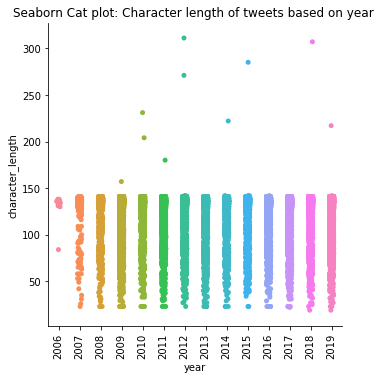

In [15]:
import seaborn as sns

sns.catplot(x = "year", y="character_length",  data= tweets);
plt.title("Seaborn Cat plot: Character length of tweets based on year ")
plt.xticks(rotation=90);

In November 2017, Twitter doubled the available character space from 140 to 280 characters.  

Looks like Twitter’s doubling of character count from 140 to 280 had little impact on length of tweets.

Hashtags:

Next, we are going to be using a function to extract what hashtags are being used (if any). We will add one column for the hashtags. 

In [16]:

def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)   

"""Try using this function above on the following tweet"""
my_tweet = 'RT @our_codingclub: Can @you find #all the #hashtags?'
find_hashtags(my_tweet)

['#all', '#hashtags']

In [17]:
#Note that each entry in these new columns will contain a list rather than a single value
tweets['hashtags'] = tweets.full_text.apply(find_hashtags)
tweets.iloc[7]

User_Id              '541878477'                                                                                                                                                                                                                                                                                                                            
Total Tweets         '4152'                                                                                                                                                                                                                                                                                                                                 
Favourites_Count     '9561'                                                                                                                                                                                                                                                                                   

In [18]:
#First we will select the column of hashtags from the dataframe, and take only the rows where there actually is a hashtag
hashtags_list_df = tweets.loc[tweets.hashtags.apply(lambda hashtags_list: hashtags_list !=[]),['hashtags']]
print(f"the first few rows should look like: {hashtags_list_df.head(3)}")

the first few rows should look like:                                                                                                                  hashtags
4    [#ElectionResults2019, #ElectionResults2019, #ElectoralCollege, #Election2020, #YangGang, #FeelTheBern, #TrumpTrain]
7    [#Trump2020]                                                                                                        
186  [#American, #Hillary]                                                                                               


In [19]:
'''To see which hashtags were popular we will need to flatten out this dataframe. Currently each row contains a list of multiple values. The next block of code will make a new dataframe where we take all the hashtags in hashtags_list_df but give each its own row. We do this using a list comprehension.'''

# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame( [hashtag for hashtags_list in hashtags_list_df.hashtags  for hashtag in hashtags_list],
                                     columns=['hashtag'])
print(f"the first few rows should look like: {flattened_hashtags_df.head(3)}")

the first few rows should look like:                 hashtag
0  #ElectionResults2019
1  #ElectionResults2019
2  #ElectoralCollege   


Now lets look at the top hashtags by their frequency of appearance:

In [20]:
# count of appearances of each hashtag
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)

In [21]:
popular_hashtags.head(10)

,hashtag,counts
0,#Bernie2020,220
1,#DWTS,119
2,#MoscowMitch,76
3,#Democrats,73
4,#BREAKING,52
5,#NEW,52
6,#NotMeUs,46
7,#EdBuck,43
8,#liddlekidzfoundation,37
9,#NoMiddleGround,36


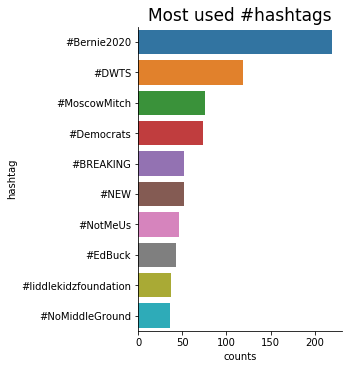

In [22]:
#Plotting a graph with the most used hashtags
sns.catplot(x = "counts", y="hashtag", kind = "bar", data= popular_hashtags[0:10]);
plt.title("Most used #hashtags", fontsize = 17);

From this figure it can be clearly seen that #Bernie2020 is the most used hashtag. #NotMeUs also is also a political organization looking to further the progressive cause by following Bernie's lead. We can guess that many of Bernie's supporters are actively opposing electoral college.

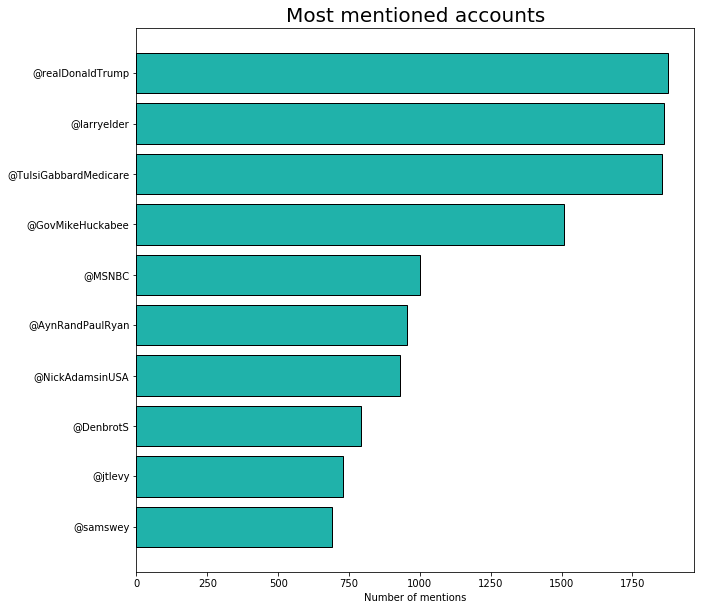

In [23]:
#Let's find the most mentioned accounts
mentions = []
mention_pattern = re.compile(r"@[a-zA-Z_]+")
mention_matches = list(tweets['full_text'].apply(mention_pattern.findall))
mentions_dict = {}
for match in mention_matches:
    for singlematch in match:
        if singlematch not in mentions_dict.keys():
            mentions_dict[singlematch] = 1
        else:
            mentions_dict[singlematch] = mentions_dict[singlematch]+1
#Create an ordered list of tuples with the most mentioned users and the number of times they have been mentioned
mentions_ordered_list =sorted(mentions_dict.items(), key=lambda x:x[1])
mentions_ordered_list = mentions_ordered_list[::-1]
#Pick the 10 top mentioned users to plot and separate the previous list into two list: one with the users and one with the values
mentions_ordered_values = []
mentions_ordered_keys = []
for item in mentions_ordered_list[0:10]:
    mentions_ordered_keys.append(item[0])
    mentions_ordered_values.append(item[1])
fig, ax = plt.subplots(figsize = (10,10))
y_pos = np.arange(len(mentions_ordered_values))
ax.barh(y_pos ,list(mentions_ordered_values)[::-1], align='center', color = 'lightseagreen', edgecolor = 'black', linewidth=1)
ax.set_yticks(y_pos )
ax.set_yticklabels(list(mentions_ordered_keys)[::-1])
ax.set_xlabel("Number of mentions")
ax.set_title("Most mentioned accounts", fontsize = 20)

plt.show()

Next, let's define a function to find out if we have any emojis in our data

In [24]:
#import required packages
import regex
import emoji

def emoticon(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)
    
    return''.join(emoji_list)

In [25]:
#let's test if our function works on arbitrary text with emoticon
testing = "I love ✉"
print(' '.join(emoji for emoji in emoticon(testing)))

✉


In [26]:

# apply the function to the whole column in the dataframe
tweets['Tweet_emot'] = tweets["full_text"].apply(lambda x: emoticon(x)) 

tweets['Tweet_emot'].value_counts()

    47181
Name: Tweet_emot, dtype: int64

There are no emoticons left in our data. Now let's compare the number of hashtags to number of mentions as below:

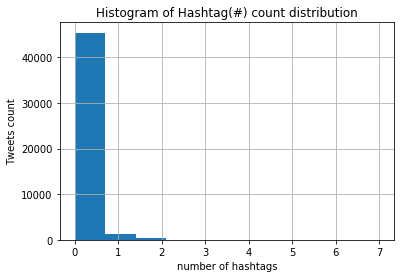

In [27]:
import matplotlib.pyplot as plt
# Function that returns number of hashtags in a string
def count_hashtags(string):
    # Split the string into words
    words = string.split()
    
    # Create a list of words that are hashtags
    hashtags = [word for word in words if word.startswith('#')]
    
    # Return number of hashtags
    return(len(hashtags))

# Create a feature hashtag_count and display distribution
tweets['hashtag_count'] = tweets['full_text'].apply(count_hashtags)
tweets['hashtag_count'].hist()
plt.title('Histogram of Hashtag(#) count distribution')
plt.xlabel("number of hashtags")
plt.ylabel("Tweets count")
plt.show()

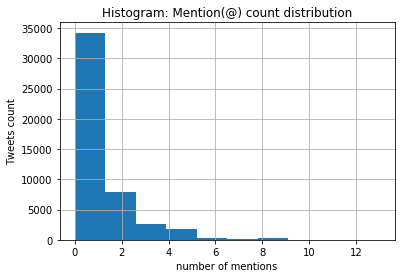

In [28]:
# Function that returns number of mentions in a string
def count_mentions(string):
    # Split the string into words
    words = string.split()
    
    # Create a list of words that are mentions
    mentions = [word for word in words if word.startswith('@')]
    
    # Return number of mentions
    return(len(mentions))

# Create a feature mention_count and display distribution
tweets['mention_count'] = tweets['full_text'].apply(count_mentions)
tweets['mention_count'].hist()
plt.title('Histogram: Mention(@) count distribution')
plt.xlabel("number of mentions")
plt.ylabel("Tweets count")
plt.show()

It looks like the number of mentions is more than the number of hashtags in our dataset. Now let's explore how many kinds of languages were retrieved.


In [29]:
#function that returns the count of unique entries in that column.
tweets.Language.value_counts()

'en'     46830
'und'    98   
'ro'     67   
'ca'     64   
'es'     57   
'fr'     26   
'de'     7    
'in'     6    
'tl'     6    
'hi'     5    
'nl'     5    
'zh'     2    
'pt'     2    
'ht'     1    
'ur'     1    
'tr'     1    
'ja'     1    
'et'     1    
'sv'     1    
Name: Language, dtype: int64

In [30]:
#selecting only English language tweets after removing quotes ('')
tweets["Language"]= tweets["Language"].str.replace("'", "", case = False) 
tweets = tweets.loc[tweets['Language'] == 'en']
#function that returns the count of unique entries in that column to check if only english language tweets were selected
tweets.Language.value_counts()


en    46830
Name: Language, dtype: int64

Now let's explore twitter data sources used by Twitter users:

In [31]:
# set options to  truncate results in the output to max 10 rows
pd.options.display.max_rows = 10
## Let's explore the tweet sources by obtaining all possible sources:
tweets['Tweet Source'].value_counts()

'Twitter for iPhone'                  17369
'Twitter for Android'                 12638
'Twitter Web App'                     11829
'Twitter for iPad'                    2873 
'Twitter Web Client'                  844  
                                     ...   
'BNCH'                                1    
'HereWeAreBot'                        1    
'Pullquote: save and share quotes'    1    
'NextScripts4ccc'                     1    
'Twidere for Android #8'              1    
Name: Tweet Source, Length: 162, dtype: int64


Based on the output, we realize that basically this twitter dataset has five sources:

Twitter for iPhone, Twitter for Android, Twitter Web App, Twitter for ipad, Media Studio. Now, let's define a function for taking the most used Tweet sources off the source column and visualize sources used by twitter users: 

In [34]:
#strip "'" from column name
tweets['Tweet Source'] = tweets['Tweet Source'].str.replace("'", "", case = False)

In [35]:
#function to aggregate top  sources
def source(x):
    if x=="Twitter for iPhone":
        return "Twitter for iPhone"

    elif x=='Twitter for Android':
        return 'Twitter for Android'
    
    elif  x == 'Twitter for iPad':
        return 'Twitter for iPad'
    
    elif x == 'Twitter Web App':
        return 'Twitter Web App'
    
    
    else:
        return "Media Studio"
tweets['Tweet Source'] = tweets['Tweet Source'].apply(source)


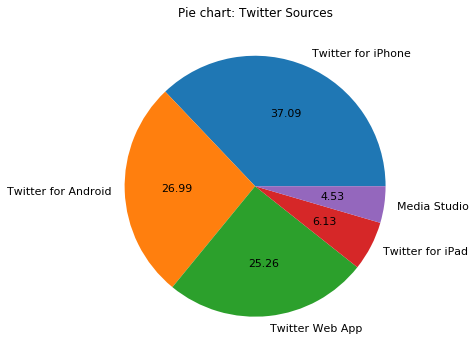

In [36]:
# Pie chart to visualize twitter sources:
pie_chart = pd.Series(tweets['Tweet Source'].value_counts())
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));
plt.title("Pie chart: Twitter Sources");
plt.ylabel("");


In [37]:
# Show duplicated tweets if exist
len(tweets[tweets.duplicated('full_text')])

27174

In [38]:
tweets.shape

(46830, 20)

__Data Preprocessing:__
    
Pre-processing is the next step in text classification, and choosing right pre-processing techniques can improve classification effectiveness. With the basic  data cleaning task done, we will now define function which can be applied to the whole dataset to extract clean text which can be used to build our target variable. Then we will apply an extensive set of pre-processing steps to decrease the size of the feature set to make it suitable for learning algorithms.

In [39]:
# Importing stop words from NLTK corpus for english language
from nltk.corpus import stopwords
# Importing word tokenizer
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))


# Load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')

In [195]:
# defining a function  to remove patterns that can be applied to the whole dataset
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt



In [196]:
#Adding a new column "clean text" by removing mention ‘@names’
tweets['clean_text'] = np.vectorize(remove_pattern)(tweets['full_text'], "@[\w]*")

"""Replace Links ((http | https))  in the text are of no use because they don’t convey any useful information"""

def remove_URL(sample):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", sample)
tweets['clean_text'] = tweets['clean_text'].apply(remove_URL)
# remove special characters, numbers, punctuations
tweets['clean_text'] = tweets['clean_text'].str.replace("[^a-zA-Z#]", " ")

#replace username-tags
#tweets['clean_text'] = tweets['clean_text'].str.replace('@[A-Z0-9a-z_:]+', " ")


#Select only the words that has 2 characters or more
tweets['clean_text'] = tweets['clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>=2]))

In [197]:
print("Raw text:")
print(tweets["Tweet Text"].iloc[1])
print("\n")
print("Clean Text:")
tweets["clean_text"].iloc[1]

Raw text:
'@verrierf @TMZ We did vote, if you recall Hillary won the popular vote by over 3 million votes.  https://t.co/n7UDt1FuYz'


Clean Text:


'We did vote if you recall Hillary won the popular vote by over million votes'

Dropping duplicate rows: 
    
We may have duplicate tweets in our data-frame, it needs to be taken care of. Let us now check if we have duplicates in tweets which is common because of the RT (Retweets):

In [198]:
tweets.drop_duplicates(subset=['clean_text'], keep = 'first',inplace= True)

In [199]:
tweets.shape

(18367, 21)

In [200]:
tweets.columns

Index(['User_Id', 'Total Tweets', 'Favourites_Count', 'Followers',
       'User_Verified', 'User Location', 'Date of Tweet', 'Tweet Id',
       'Tweet Text', 'Language', 'Tweet Source', 'Tweet Retweet',
       'Tweet Reply To Id', 'full_text', 'character_length', 'year',
       'hashtags', 'Tweet_emot', 'hashtag_count', 'mention_count',
       'clean_text'],
      dtype='object')

In [201]:
tweets.drop([ 'Language', 'Tweet Reply To Id', 'character_length',
             'Tweet_emot', 'hashtag_count', 'mention_count'], axis=1, inplace = True)

In [202]:
df2 = tweets.copy()

In [203]:
df2.head()

,User_Id,Total Tweets,Favourites_Count,Followers,User_Verified,User Location,Date of Tweet,Tweet Id,Tweet Text,Tweet Source,Tweet Retweet,full_text,year,hashtags,clean_text
0,'1658338609','313','657','80','False','',2013-08-09 18:06:33,'1194457803089276928','RT @MrDuganDVOLP: Worked with Lila and Nate today at BGHS Online Lab. Great conversations regarding Electoral College and life after high\xe2\x80\xa6',Twitter for Android,'2',@MrDuganDVOLP: Worked with Lila and Nate today at BGHS Online Lab. Great conversations regarding Electoral College and life after high,2013,[],Worked with Lila and Nate today at BGHS Online Lab Great conversations regarding Electoral College and life after high
1,'185949950','10396','11498','271','False','',2010-09-02 06:23:41,'1194457753256775686',"'@verrierf @TMZ We did vote, if you recall Hillary won the popular vote by over 3 million votes. https://t.co/n7UDt1FuYz'",Twitter for iPhone,'0',"@verrierf @TMZ We did vote, if you recall Hillary won the popular vote by over 3 million votes. https://t.co/n7UDt1FuYz",2010,[],We did vote if you recall Hillary won the popular vote by over million votes
2,'3809154554','10916','11841','2101','False',"'Burbank, CA'",2015-10-07 01:32:48,'1194457695308222464','@MaddowBlog @MSNBC If anything the circus about the impeachment comes 2 late that guy and his fascist minions have destroyed the USA thx to the ABBERANTLY RIDICULOUSLY STUPIDLY REDUNDANT OBSOLETE ELECTORAL COLLEGE and z APATHY of 108 millions of eligible voters that didnt vote in 2016',Twitter for Android,'0',@MaddowBlog @MSNBC If anything the circus about the impeachment comes 2 late that guy and his fascist minions have destroyed the USA thx to the ABBERANTLY RIDICULOUSLY STUPIDLY REDUNDANT OBSOLETE ELECTORAL COLLEGE and z APATHY of 108 millions of eligible voters that didnt vote in 2016,2015,[],If anything the circus about the impeachment comes late that guy and his fascist minions have destroyed the USA thx to the ABBERANTLY RIDICULOUSLY STUPIDLY REDUNDANT OBSOLETE ELECTORAL COLLEGE and APATHY of millions of eligible voters that didnt vote in
3,'289118612','2200777','19420','65108','False',"'Atlanta, GA'",2011-04-28 01:56:15,'1194457679592341507','The Democratic nominee against Trump could beat him by far more votes than Hillary Clinton did in 2016 \xe2\x80\x94 and still lose\xe2\x80\xa6 https://t.co/RKPLB4tzoT',Media Studio,'0',The Democratic nominee against Trump could beat him by far more votes than Hillary Clinton did in 2016 and still lose https://t.co/RKPLB4tzoT,2011,[],The Democratic nominee against Trump could beat him by far more votes than Hillary Clinton did in and still lose
4,'1192518029684461570','9','0','1','False','United States',2019-11-07 19:03:58,'1194457622914707457','We\xe2\x80\x99re still skewed by population but not quite near as much. TGI Electoral College... \n#ElectionResults2019\xe2\x80\xa6 #ElectionResults2019 #ElectoralCollege #Election2020 #YangGang #FeelTheBern #TrumpTrain https://t.co/5ilhukuqnr',Twitter for iPhone,'0',Were still skewed by population but not quite near as much. TGI Electoral College... #ElectionResults2019 #ElectionResults2019 #ElectoralCollege #Election2020 #YangGang #FeelTheBern #TrumpTrain https://t.co/5ilhukuqnr,2019,"[#ElectionResults2019, #ElectionResults2019, #ElectoralCollege, #Election2020, #YangGang, #FeelTheBern, #TrumpTrain]",Were still skewed by population but not quite near as much TGI Electoral College #ElectionResults #ElectionResults #ElectoralCollege #Election #YangGang #FeelTheBern #TrumpTrain


In [205]:
# exporting df2 as csv file
#df2.to_csv("@tweets14.csv", index = False)

__Target variable:__

We built a target variable column (classify tweets as  positive , negative or neutral) to label the sentiment of the "clean_text" column as explained in this [link](https://github.com/aspiringdatascientist/Capstone2-Sentiment-Analysis-of-Twitter-data/blob/master/label_tweets.ipynb). To create target variable, we have compared several sentiment analyzer tools which are widely available for classifying the  data such as VADER, Textblob, SentiWordNet lexicon from NTLK, StanfordCoreNLP, Afinn as provided in this [link](https://github.com/aspiringdatascientist/Capstone2-Sentiment-Analysis-of-Twitter-data/blob/master/label_tweets.ipynb)

StanfordCoreNLP will be used to label our tweets dataset since it is designed to help evaluate a model’s ability to understand representations of sentence structure, rather than just looking at individual words in isolation.

In [40]:
# load the labelled csv file as pandas df
df3 = pd.read_csv("@tweets_final1.csv")
df3.drop(["full_text","Tweet Text"], axis = 1, inplace = True)
print(df3.shape)
df3.head(2)

(18366, 15)


,Date of Tweet,User_Id,Total Tweets,Favourites_Count,Followers,User_Verified,User Location,Tweet Id,Tweet Source,Tweet Retweet,year,hashtags,clean_text,sentiment,sentiment_val
0,2013-08-09 18:06:33,'1658338609','313','657','80','False','','1194457803089276928',Twitter for Android,'2',2013,[],Worked with Lila and Nate today at BGHS Online Lab Great conversations regarding Electoral College and life after high,Negative,-1
1,2010-09-02 06:23:41,'185949950','10396','11498','271','False','','1194457753256775686',Twitter for iPhone,'0',2010,[],We did vote if you recall Hillary won the popular vote by over million votes,Negative,-1


In [41]:
#remove stop words and create a new column "token_filtered"
df3['token_filtered'] = df3['clean_text'].apply(lambda x: x.lower())
#print(len(stop_words))
new_stopwords = ['could','much' ,'quite','hers', 'between','go','arnt','This','the','When','we','It','many','we','n','f','but', 'The','again','cou', 'there', 'votes', 'about','once','gio','n','n f',' n','  n' ,'n ','f','during', 'out', 'very', 'having', 'with','they', 'own', 'an', 'be', 'some', 'for', 'do', 'its',  'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don','nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above',  'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and',    'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why',                               'so', 'can', 'did',  'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only',  'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my','a',  'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than']
stop_words.update(new_stopwords)
df3['token_filtered'] = df3['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
#print(len(stop_words))
#Now, let's focus on Tokenization and lemmatization:
# Import the necessary modules
from nltk.tokenize  import regexp_tokenize
from nltk.tokenize  import  TweetTokenizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

# tokenize helper function
def pre_processing(tweets):
    
    lower_tokens = [w for w in word_tokenize(tweets.lower())]
    # Retain alphabetic words: alpha_only
    alpha_only = [t for t in lower_tokens if t.isalpha()]

    # Remove all stop words: no_stops
    no_stops = [t for t in alpha_only if t not in stop_words]
    
    pstemmer = PorterStemmer()
    stemmed = [pstemmer.stem(word) for word in no_stops]

    # Instantiate the WordNetLemmatizer
    wordnet_lemmatizer = WordNetLemmatizer()

         # Lemmatize all tokens into a new list: lemmatized
        #and # Detokenize cleaned dataframe for vectorizing
    lemmatized = ' '.join([wordnet_lemmatizer.lemmatize(t) for t in stemmed ])
    
    
    
    return lemmatized
# Apply the extraction to the token_filtered column
df3["processed_text"] = df3["token_filtered"].apply(pre_processing)
    
df3[['clean_text','token_filtered',"processed_text"]][10:12]


,clean_text,token_filtered,processed_text
10,All throughout comments excuses excuses blah blah electoral college unless Dems deal with this elephant it will bite them in the in,All throughout comments excuses excuses blah blah electoral college unless Dems deal elephant bite,throughout comment excus excus blah blah elector colleg unless dem deal eleph bite
11,Keep this before America she needs to see what the electoral college put at her helm,Keep America needs see electoral college put helm,keep america need see elector colleg put helm


__Data Visualization:__




Here, we would like to illustrate most commonly used words:

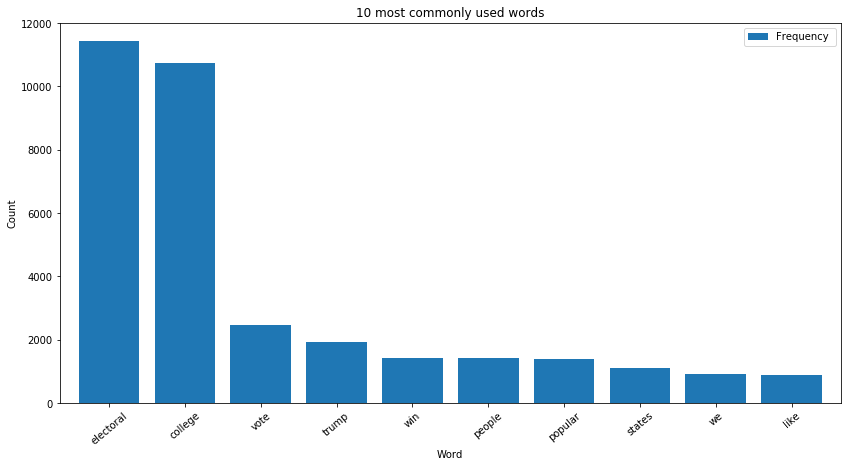

In [42]:
from collections import Counter


# generate DF out of Counter

words = (df3.token_filtered.str.lower().str.cat(sep=' ').split())
result = pd.DataFrame(Counter(words).most_common(10),
                    columns=['Word', 'Frequency ']).set_index('Word')
#BAR CHART
result.plot.bar(rot=40, figsize=(14,7), width=0.8,colormap='tab10');
plt.title("10 most commonly used words")
plt.ylabel("Count");

Analyzing the results:

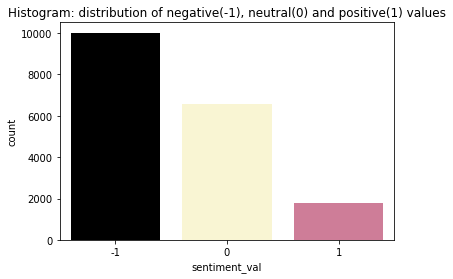

In [43]:
import seaborn as sns
sns.countplot("sentiment_val", data = df3, palette =["black","lemonchiffon","palevioletred"])
plt.title("Histogram: distribution of negative(-1), neutral(0) and positive(1) values");



__Word Cloud visualization:__ 

A word cloud represents word usage in a document by resizing individual words proportionally to its frequency and then presenting them in a random arrangement. The textual analysis  of our tweets provides a general idea of what kind of words are frequent in our corpus. 
 
The word clouds give greater prominence to words that appear more frequently in the source text. Create and generate word cloud image of the tweets having positive sentiment, neutral sentiment and negative sentiment as below:

In [44]:
# Import the word cloud function and stop words list
from wordcloud import WordCloud, STOPWORDS 

import matplotlib.pyplot as plt

# GENERATE POSITIVE TEXT,NEGATIVE TEXT,NEUTRAL TEXT 
positive_text=""
negative_text=""
neutral_text=""

for i in range(len(df3.index)):
    if(df3.loc[i]["sentiment_val"]==1):
        positive_text+=df3.loc[i]["token_filtered"]
    elif(df3.loc[i]["sentiment_val"]==-1):
        negative_text+=df3.loc[i]["token_filtered"]
    else:
        neutral_text+=df3.loc[i]["token_filtered"]

list_text = [positive_text,negative_text,neutral_text]


# Define the list of stopwords
my_stop_words = STOPWORDS.update(['electoral college','electoral','college', 'how', 'further', 'vote','trump','president','was', 'winning','here','state','people','elected', 'https','co''data','than','give','sake','step','signed','millions'])




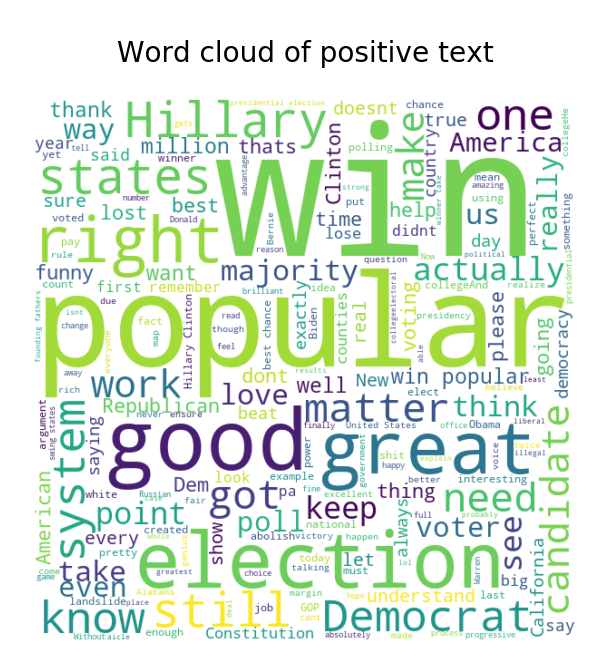

In [45]:
word_cloud = WordCloud(width = 600,height = 600,background_color='white',stopwords=my_stop_words).generate(positive_text)
plt.figure(figsize=(12,10))# create a new figure
plt.imshow(word_cloud,interpolation="bilinear")
plt.title(" \n Word cloud of positive text \n " ,fontsize = 28)
plt.axis("off")
plt.show()

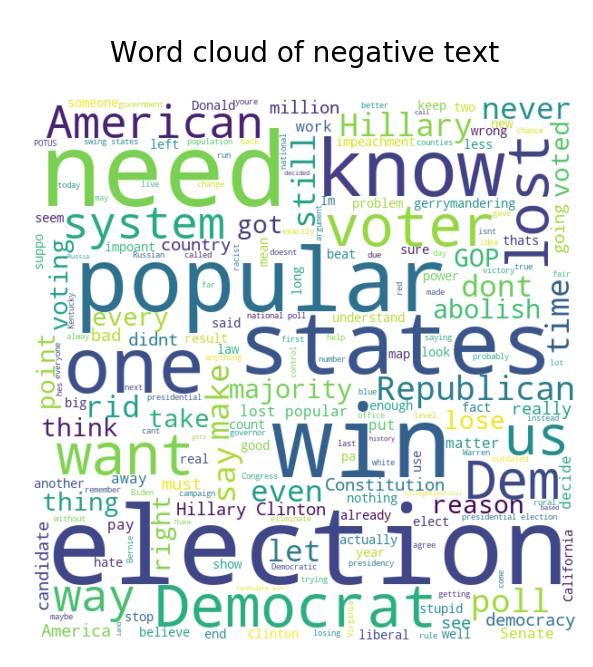

In [46]:
word_cloud = WordCloud(width = 600,height = 600,background_color='white',stopwords=my_stop_words).generate(negative_text)
plt.figure(figsize=(12,10))# create a new figure
plt.imshow(word_cloud,interpolation="bilinear")
plt.title("\n Word cloud of negative text \n",fontsize = 28)
plt.axis("off")
plt.show()

Language mentions over time:

First, let's define a function to check if a word is in a Twitter dataset's text

In [47]:
def check_word_in_tweet(word, data):
    """Checks if a word is in a Twitter dataset's text. 
    
    Returns a logical pandas Series.
    """
    contains_column = data['token_filtered'].str.contains(word, case = False)
    
    return contains_column

# Convert the created_at column to np.datetime object
df3['Date of Tweet'] = pd.to_datetime(df3['Date of Tweet'])


# Set the index of df3 to 'Date of Tweet'
df3 = df3.set_index('Date of Tweet')



In [48]:
# Create a democrat column
df3['democrat'] = check_word_in_tweet('democrat', df3)

# Create republic column
df3['republican'] = check_word_in_tweet('republican', df3)

In [49]:
df3.head(1)

,User_Id,Total Tweets,Favourites_Count,Followers,User_Verified,User Location,Tweet Id,Tweet Source,Tweet Retweet,year,hashtags,clean_text,sentiment,sentiment_val,token_filtered,processed_text,democrat,republican
Date of Tweet,,,,,,,,,,,,,,,,,,
2013-08-09 18:06:33,'1658338609','313','657','80','False','','1194457803089276928',Twitter for Android,'2',2013,[],Worked with Lila and Nate today at BGHS Online Lab Great conversations regarding Electoral College and life after high,Negative,-1,Worked Lila Nate today BGHS Online Lab Great conversations regarding Electoral College life high,work lila nate today bgh onlin lab great convers regard elector colleg life high,False,False


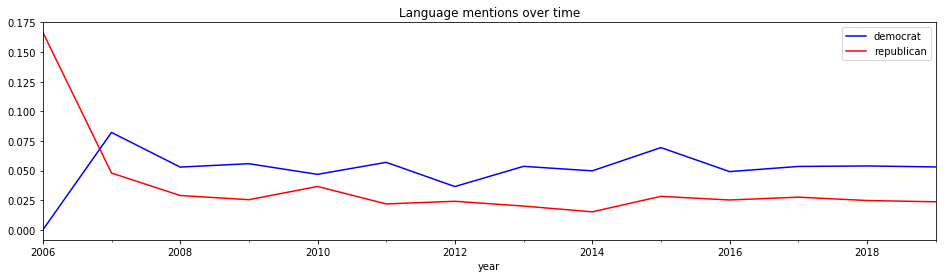

In [50]:

# Average of google column by day
mean_democrat =pd.Series(df3['democrat'].resample('A').mean())

# Average of apple column 
mean_republican = pd.Series(df3['republican'].resample('A').mean())
mean_democrat.plot(figsize=(16,4), label="democrat",color = 'blue',kind = 'line', legend=True);
mean_republican.plot(figsize=(16,4), label="republican", color = 'red',kind = 'line', legend=True);
plt.xlabel("year")
plt.title('Language mentions over time');


As we can see in the plot above, the term “democrat” has been mentioned mostly consistently more number of times compared to the term “replublican”.

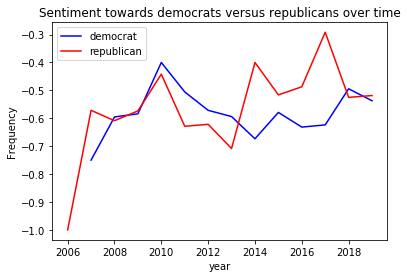

In [51]:
# Generate average sentiment scores for democrat
sentiment_val = df3.sentiment_val
sentiment_democrat = sentiment_val[ check_word_in_tweet('democrat', df3) ][0:1000].resample('A').mean()

# Generate average sentiment scores for republican
sentiment_republican = sentiment_val[ check_word_in_tweet('republican',df3) ][0:1000].resample('A').mean()

# Plot sentiments of democrats/republican by year

plt.plot(sentiment_democrat.index.year, sentiment_democrat, color = 'blue')
plt.plot(sentiment_republican.index.year, sentiment_republican, color ='red' )
# Add labels and show
plt.xlabel('year'); plt.ylabel('Frequency')
plt.title('Sentiment towards democrats versus republicans over time')
plt.legend(('democrat', 'republican'))
plt.show()

 When we compare the opinion trend as seen in the plot above, surprisingly, sentiment toward republicans looks slightly better than democrats just after 2013.


Now, let's analyze the sentiment towards electoral college:

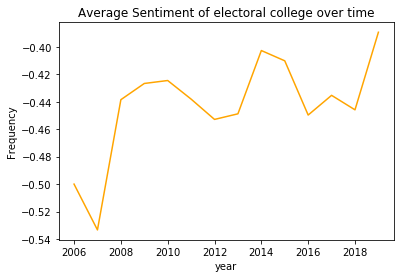

In [52]:

# Generate average sentiment scores for " electoral college "
sentiment = df3["sentiment_val"]
sentiment_ec = sentiment[ check_word_in_tweet('electoral college', df3) ].resample('A').mean()

# Plot sentiments of democrats/republican by year


plt.plot(sentiment_ec.index.year, sentiment_ec, color ='orange' , label = 'electoral college')
# Add labels and show
plt.xlabel('year'); plt.ylabel('Frequency')
plt.title('Average Sentiment of electoral college over time')
#plt.legend(('electoral college'))
plt.show()

We can see from the plot above that the average sentiment towards electoral college has been negative for the large part comparitively, after it peaked in 2014 suggesting it could have been due to 2016 election results. We will now segregate  tweets based on sentiment counts and compare it over the years.

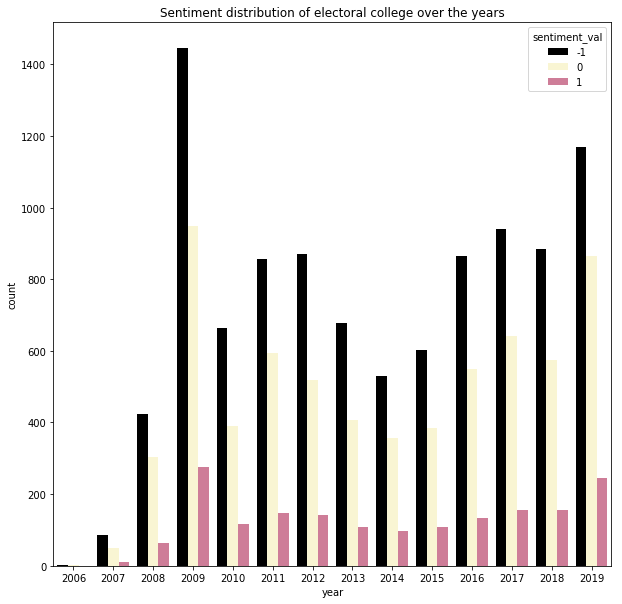

In [53]:
# First bar ploty='democrat',
plt.figure(figsize=(10,10))
sns.countplot(data = df3, x = 'year',hue='sentiment_val', palette =["black","lemonchiffon","palevioletred"]);
plt.title("Sentiment distribution of electoral college over the years");


__Inferential Statistics:__

Based on the plot above, we can see that there was a noticeable variations in polarity of average sentiment throughout the years. I would like to to test whether this hypothesis is commensurate with the data, especially from 2014 to 2016.  The dataset has twitter data from  from 2006 to 2018.
The samples derived based on years are independent of each other and are random. I would be perfoming a two sample, two-tailed Z test. I would be also be performing a two sample Bootstrap hypothesis test with null hypothesis being that there is no difference in means with regards to the average sentiment polarity.

Null Hypothesis:

$ Ho \Rightarrow  \mu_{1} = \mu_{2} $ 


Alternate Hypothesis:

$ Ha \Rightarrow  \mu_{1} \neq \mu_{2}  $



In [54]:
#Segregate the data based on the year

sentiment_2014, sentiment_2016 = df3[df3['year']==2014]['sentiment_val'], df3[df3['year']==2016]['sentiment_val']


In [55]:
def diff_of_means(data_1,data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) -  np.mean(data_2)

    return diff
empirical_diff_means = diff_of_means(sentiment_2014, sentiment_2016)
print(f"sentiment_2014 mean : {np.mean(sentiment_2014)}")

print(f"sentiment_2016 mean : {np.mean(sentiment_2016)}")
print(f"Empirical difference of means: {empirical_diff_means}")


sentiment_2014 mean : -0.43902439024390244
sentiment_2016 mean : -0.4721862871927555
Empirical difference of means: 0.033161896948853076


The average sentiment polarity for the year 2014 was -0.44, and that of year 2016 was 0.47 with a difference of 0.042. It is possible this observed difference in mean was by chance. We will compute the probability of getting at least a 0.042 difference in average sentiment polarity under the hypothesis that the average sentiment polarity in both years are identical. Two-sample bootstrap hypothesis test for difference of means:

We now want to test the hypothesis that the year 2014 and 2016 have the same average sentiment polarity with respect to electoral college using the two-sample bootstrap test. Here, we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value will be the fraction of replicates with a difference in means greater than or equal to what was observed.

.

In [56]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates

# Concatenate sentiments: sent_concat
sent_concat = np.concatenate((sentiment_2014,sentiment_2016))
# Compute mean of all trips: mean_trips
mean_sentiment = np.mean(sent_concat)

# Generate shifted arrays
sentiment_2014_shifted = sentiment_2014 - np.mean(sentiment_2014) + mean_sentiment
sentiment_2016_shifted = sentiment_2016 - np.mean(sentiment_2016) + mean_sentiment

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_2014 = draw_bs_reps(sentiment_2014_shifted , np.mean,size= 10000)
bs_replicates_2016 = draw_bs_reps(sentiment_2016_shifted , np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_2014 - bs_replicates_2016

# Compute and print p-value: p
p = np.sum(bs_replicates == empirical_diff_means) / len(bs_replicates)

#Confidence Interval(ci)
ci = np.percentile(bs_replicates, [95])

print('p-value :', p)
if p < 0.05:
    print(f"Since p-value is  < 0.05, the difference  is statistically significant and we reject Null Hypothesis with {1 -ci}% confidence")
else:
    print("Accept null hypothesis")

p-value : 0.0
Since p-value is  < 0.05, the difference  is statistically significant and we reject Null Hypothesis with [0.95565004]% confidence


We got a p-value of 0, which suggests that there is a statistically significant difference in the average sentiment polarity from 2014 to 2016. But it is very important to know how different they are! We got a difference of 0.042 between the means. The difference doesn't seem to be that substantial and there might be few situations where sentiment polarity varies.

Since p-value is  < 0.05, the difference  is statistically significant rendering evidence to reject the hypothesis with 95% confidence.

In [57]:
#df3.to_csv("@tweets6.csv", index = False)

In [60]:
# import the csv file as Pandas dataframe
df3 = pd.read_csv("@tweets6.csv")
#Dropping irrelevant columns:
df3.drop(["User_Id","Tweet Id","token_filtered", "hashtags",'clean_text','User Location' ,"sentiment"], axis = 1, inplace = True)


__Modeling:__

***Feature Union with Heterogeneous Data Sources:***

In our dataset, we have both text features and numerical values so we need to transform both the text and numerical values differently. Using sklearn.feature_extraction.FeatureUnion  on our dataset, we combine numerical (10 columns) and text features (1 column) for multi-class classification.Scikit learn provides a really nice feature for building the model using Pipeline.  We compute standard bag-of-words features for the "processed_text" column.

In [61]:
#Analyzing columns
df3.columns

Index(['Total Tweets', 'Favourites_Count', 'Followers', 'User_Verified',
       'Tweet Source', 'Tweet Retweet', 'year', 'sentiment_val',
       'processed_text', 'democrat', 'republican'],
      dtype='object')

In [62]:
# Map the lowering function to all column names
df3.columns = map(str.lower, df3.columns)
df3.rename(columns={'tweet retweet':'tweet_retweet','tweet source':'tweet_source','total tweets':'total_tweets'}, inplace=True)
df3.columns

Index(['total_tweets', 'favourites_count', 'followers', 'user_verified',
       'tweet_source', 'tweet_retweet', 'year', 'sentiment_val',
       'processed_text', 'democrat', 'republican'],
      dtype='object')

In [63]:
#check for null values
df3.isnull().sum()

total_tweets        0 
favourites_count    0 
followers           0 
user_verified       0 
tweet_source        0 
                   .. 
year                0 
sentiment_val       0 
processed_text      16
democrat            0 
republican          0 
Length: 11, dtype: int64

We can see that processed Text has null entries. Let's drop null values and confirm:

In [64]:
#Summarize the data and Explore datatypes in pandas after dropping null values
df3.dropna(subset=['processed_text'], inplace=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18350 entries, 0 to 18365
Data columns (total 11 columns):
total_tweets        18350 non-null object
favourites_count    18350 non-null object
followers           18350 non-null object
user_verified       18350 non-null object
tweet_source        18350 non-null object
tweet_retweet       18350 non-null object
year                18350 non-null int64
sentiment_val       18350 non-null int64
processed_text      18350 non-null object
democrat            18350 non-null bool
republican          18350 non-null bool
dtypes: bool(2), int64(2), object(7)
memory usage: 1.4+ MB


In [65]:
# Print the summary statistics
df3.describe()

,year,sentiment_val
count,18350.000000,18350.000000
mean,2013.689646,-0.449537
std,3.669129,0.662964
min,2006.000000,-1.000000
25%,2010.000000,-1.000000
50%,2014.000000,-1.000000
75%,2017.000000,0.000000
max,2019.000000,1.000000


In [66]:
df3 = df3.applymap(lambda x: str(x).strip("'"))
df3.head(1)

,total_tweets,favourites_count,followers,user_verified,tweet_source,tweet_retweet,year,sentiment_val,processed_text,democrat,republican
0,313,657,80,False,Twitter for Android,2,2013,-1,work lila nate today bgh onlin lab great convers regard elector colleg life high,False,False


In [67]:
#Select Categorical columns:
cat_col = [c for c in df3.columns if df3.dtypes[c] in [np.object]]
print(f"The categorical columns: {cat_col}")
#decide which variable you want to use in a model

for col_name in df3.columns:
    if df3[col_name].dtypes == 'object':
        unique_cat = len(df3[col_name].unique())
        print(f"feature {col_name} has {unique_cat} unique categories")

The categorical columns: ['total_tweets', 'favourites_count', 'followers', 'user_verified', 'tweet_source', 'tweet_retweet', 'year', 'sentiment_val', 'processed_text', 'democrat', 'republican']
feature total_tweets has 11781 unique categories
feature favourites_count has 11507 unique categories
feature followers has 4557 unique categories
feature user_verified has 2 unique categories
feature tweet_source has 5 unique categories
feature tweet_retweet has 256 unique categories
feature year has 14 unique categories
feature sentiment_val has 3 unique categories
feature processed_text has 17873 unique categories
feature democrat has 2 unique categories
feature republican has 2 unique categories


In [68]:
# convert as categorical  and numeric variables
df3['user_verified'] = df3.user_verified.astype('category')
df3['total_tweets'] = df3.total_tweets.astype('int64')
df3["favourites_count"] = df3["favourites_count"].astype('int64')
df3["followers"] = df3["followers"].astype('int64')
df3["tweet_source"] = df3["tweet_source"].astype('category')
df3["tweet_retweet"] = df3["tweet_retweet"].astype('int64')
df3["sentiment_val"] = df3["sentiment_val"].astype('int64')
df3["democrat"] = df3["democrat"].astype("category")
df3["republican"] = df3["republican"].astype("category")
df3["year"] = df3["year"].astype("category")

In [69]:
#Return the dtypes in the DataFrame.
df3.dtypes

total_tweets        int64   
favourites_count    int64   
followers           int64   
user_verified       category
tweet_source        category
                      ...   
year                category
sentiment_val       int64   
processed_text      object  
democrat            category
republican          category
Length: 11, dtype: object

In [70]:
#Select Categorical columns:
label_cat_features = ["user_verified","tweet_source","year","democrat","republican"]
label_cat_features

['user_verified', 'tweet_source', 'year', 'democrat', 'republican']

In [71]:
numeric_cols =  [c for c in df3.columns if df3.dtypes[c] in [np.int64]]
numeric_cols

['total_tweets',
 'favourites_count',
 'followers',
 'tweet_retweet',
 'sentiment_val']

In [72]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for field in label_cat_features:
    df3[field] = label_encoder.fit_transform(df3[field])
#read first two rows after transforming categorical columns as numerical columns
df3.head(2)

,total_tweets,favourites_count,followers,user_verified,tweet_source,tweet_retweet,year,sentiment_val,processed_text,democrat,republican
0,313,657,80,0,2,2,7,-1,work lila nate today bgh onlin lab great convers regard elector colleg life high,0,0
1,10396,11498,271,0,4,0,4,-1,vote recal hillari popular vote million,0,0


Text(0.5, 1.0, 'Seaborn Heat Map of correlation coefficients')

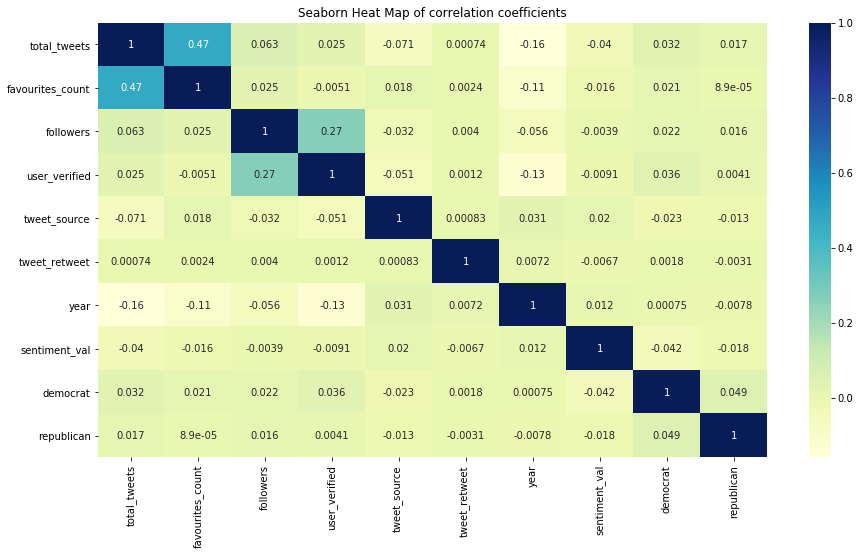

In [73]:
#numeric_cols =  [c for c in df.columns if df.dtypes[c] in [np.int64,np.uint8, np.int32]]
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.heatmap(df3.corr(), annot=True, cmap="YlGnBu");
plt.title("Seaborn Heat Map of correlation coefficients")

It’s important to note that with the color gradient map created, high correlations is displayed in increasing blue shades, and lower correlations trending into the yellow hues. The diagonal plane mirrors itself on either side, with self to self correlations.Our target variable "sentiment_val" does not seem to have either strong positive or negative correlation with any of the other numerical features.

In [74]:
#Modeling with Feature Union
# Import the CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
# Import FeatureUnion
from sklearn.pipeline import FeatureUnion
# Import Pipeline
from sklearn.pipeline import Pipeline

# Import other necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Import random forest classifer
from sklearn.ensemble import RandomForestClassifier

# Import the Imputer object

from sklearn.impute import SimpleImputer
# Import FunctionTransformer
from sklearn.preprocessing import FunctionTransformer

# Obtain the text data: get_text_data
get_text_data = FunctionTransformer(lambda x: x['processed_text'], validate=False)

# Obtain the numeric data: get_numeric_data

get_numeric_data = FunctionTransformer(lambda x: x[['total_tweets', 'favourites_count', 'followers', 'user_verified',
                                                    'tweet_source', 'tweet_retweet', 'year', 'democrat', 'republican']], validate=False)

# Fit and transform the text data: just_text_data
just_text_data = get_text_data.fit_transform(df3)

# Fit and transform the numeric data: just_numeric_data
just_numeric_data = get_numeric_data.fit_transform(df3)

X = df3[['total_tweets', 'favourites_count', 'followers', 'user_verified',
        'tweet_source', 'tweet_retweet', 'year', 'democrat', 'republican','processed_text']]
y = df3["sentiment_val"]

# Split using ALL data in sample_df
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,stratify = y,   random_state=22)


# Create a FeatureUnion with nested pipeline: process_and_join_features
process_and_join_features = FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('Imputer', SimpleImputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer',CountVectorizer(1,2))
                ]))
             ])
#Instantiate nested pipeline: pl
pl = Pipeline([
        ('union', process_and_join_features),
        ('clf', RandomForestClassifier(n_estimators = 100))
         
    
    
    ])


# Fit pl to the training data
pl.fit(X_train, y_train)

# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on  all data: ", accuracy)



Accuracy on  all data:  0.6198910081743869


In [17]:
#print the first twenty selected text features
print(pl.named_steps['union'].transformer_list[1][1].named_steps['vectorizer'].get_feature_names()[:20])

['aaaaand', 'aaarghh', 'aag', 'aaron', 'ab', 'abalama', 'abandon', 'abberantli', 'abbrevi', 'abc', 'abdic', 'aberra', 'abett', 'abi', 'abia', 'abid', 'abil', 'abject', 'abl', 'ablish']


The dataset contains features that are not necessary to solve our multi-classification problem. Let's just focus on text classification henceforth:

__Modeling: Multi-Class Text Classification-Model Comparison and Selection__

__Train/Test Split:__

The next step is to split the data into a training set and a test set.

In [18]:
#Analyzing the results before splitting the data into training and test sets
df3.reset_index(inplace = True)
pos_tweets = [ tweet for index, tweet in enumerate(df3['processed_text']) if df3['sentiment_val'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(df3['processed_text']) if df3['sentiment_val'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(df3['processed_text']) if df3['sentiment_val'][index] < 0]
print("Percentage of positive tweets: {0:.2f}%".format(len(pos_tweets)*100/len(df3['processed_text'])))
print("Percentage of neutral tweets: {0:.2f}%".format(len(neu_tweets)*100/len(df3['processed_text'])))
print("Percentage of negative tweets: {0:.2f}%".format(len(neg_tweets)*100/len(df3['processed_text'])))

Percentage of positive tweets: 9.60%
Percentage of neutral tweets: 35.84%
Percentage of negative tweets: 54.56%


 Some labels don't occur very often, but we want to make sure that they appear in both the training and the test sets. We provide a parameter stratify which means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset

In [19]:
# Identify target and input features
X = df3['processed_text'].values
y = df3['sentiment_val'].values

In [20]:
#Split the data into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify = y,random_state = 123)

__Feature Engineering:__

After splitting the data set, the next steps includes feature engineering. We will convert our text documents to a matrix of token counts (CountVectorizer), then transform a count matrix to a normalized tf-idf representation (tf-idf transformer). After that, we train several classifiers from Scikit-Learn library.

In [137]:
"""The classification algorithm will need feature vectors, therefore we will convert our tweets into the Bag of Words (BoW) Model"""
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import metrics
import nltk
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.naive_bayes import MultinomialNB
#initialize count vectorizer
count_vect = CountVectorizer(ngram_range=(1, 2))
# fit and transform X-train values
X_train_counts = count_vect.fit_transform(X_train)  

#initialize TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_new_counts = count_vect.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_new_counts)


classifier = MultinomialNB()
classifier.fit(X_train_tfidf,y_train)
y_pred = classifier.predict(X_test_tfidf)

cm = confusion_matrix(y_test,y_pred)
print(cm)
precision, recall, fscore, support = score(y_test, y_pred,  average=None, labels=np.unique(y_pred))
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

[[1955   47    0]
 [1130  185    0]
 [ 329   24    0]]
precision: [0.57264206 0.72265625]
recall: [0.97652348 0.14068441]
fscore: [0.72193501 0.23551878]
support: [2002 1315]


Next, let's construct the cumulative distribution of document frequencies (df). The  𝑥 -axis is a document count  𝑥𝑖  and the  𝑦 -axis is the percentage of words that appear less than  𝑥𝑖  times. We have to look for the point at which the curve begins climbing steeply. This may be a good value for `min_df` (used for removing terms that appear too infrequently) and for `max_df` (used for removing terms that appear too frequently), we would likely pick the value where the curve starts to plateau. 

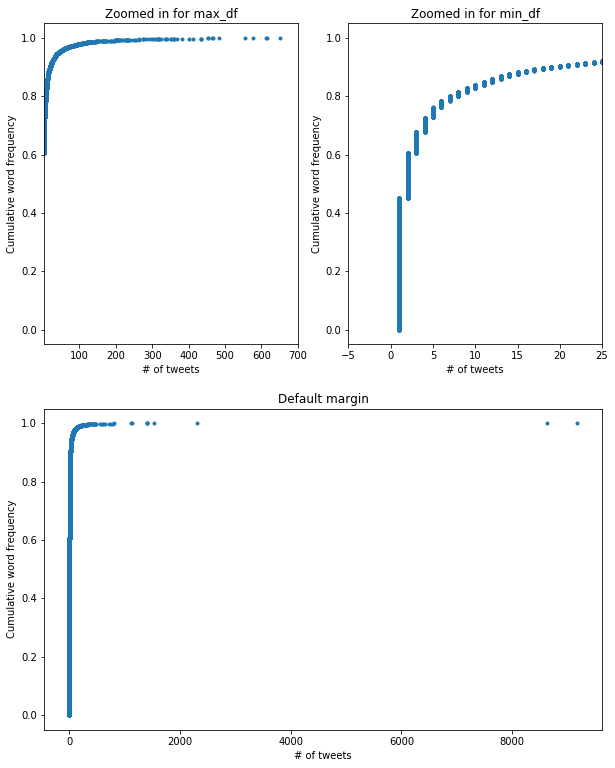

In [22]:
# Transform matrix to dataframe
df2 = pd.DataFrame((X_train_tfidf>0).sum(axis=0)).T

df2.columns = ['frequency']

#defining ecdf function 
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: yThe y data of the ECDF go from 1/n to 1 in equally spaced increments. You can construct this using np.arange().
    #Remember, however, that the end value in np.arange() is not inclusive. Therefore, np.arange() will need to go from 1 to n+1.
    # Be sure to divide this by n.
    y = np.arange(1,n+1) / n

    return x, y
'''use  ecdf() function to Construct the cumulative distribution of document frequencies plots '''
x_1 , y_1 = ecdf(df2.frequency)
fig, (ax1, ax2,ax3) = plt.subplots(3, figsize = (10,13))

ax1 = plt.subplot(212)
plt.plot(x_1 , y_1, marker = ".", linestyle= 'none')
ax1.set_title('Default margin')
plt.xlabel("# of tweets")
plt.ylabel('Cumulative word frequency')

ax2 = plt.subplot(221)
plt.plot(x_1 , y_1, marker = ".", linestyle= 'none')
plt.xlim(3, 700)
ax2.set_title('Zoomed in for max_df')
plt.xlabel("# of tweets")
plt.ylabel('Cumulative word frequency')
ax3 = plt.subplot(222)
plt.plot(x_1 , y_1, marker = ".", linestyle= 'none')
plt.xlim(-5, 25)
ax3.set_title('Zoomed in for min_df')
plt.xlabel("# of tweets")
plt.ylabel('Cumulative word frequency')
plt.show()

As we can see from the plot, the curve rises steeply just around 0. To set the min_df and max_df, we need to see the zoomed in version of the plots by setting axis limits. 15 tweets or less had 85% of words in vocabulary. Min_df is used for removing terms that appear too infrequently., and max_df is used for removing terms that appear too frequently. The curve starts to plateau from 100 till it reaches 400. So, I think if we set min_df = 15 and max_df = 250, that should cover maximum% of the vocabulary.

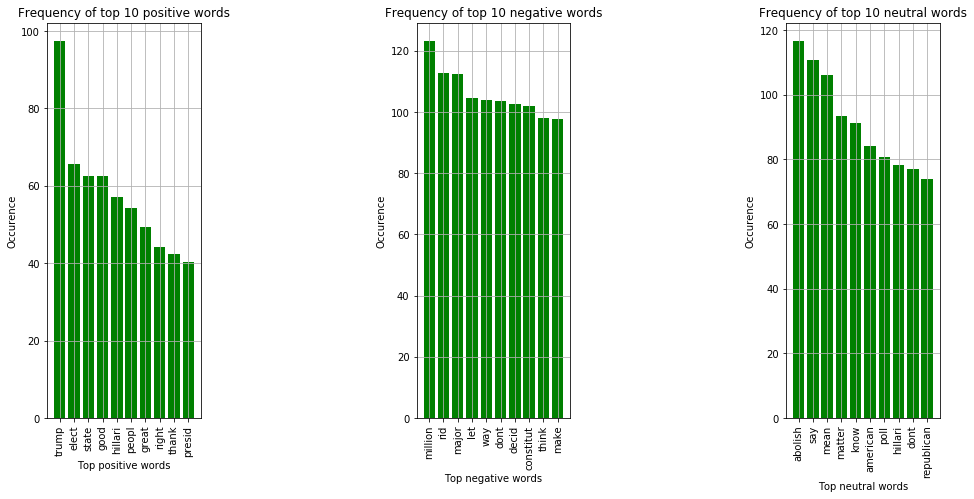

In [23]:
#Plot top words
def positive_words():    
    # Print top words
    vect = TfidfVectorizer(stop_words='english',analyzer="word",min_df = 15, max_df = 250)
    filt = df3[df3['sentiment_val'] == 1]
    data_dtm = vect.fit_transform(filt['processed_text'])
    feat_dtm = vect.get_feature_names()

    # Count words
    freq_tbl=pd.DataFrame({'Word':feat_dtm,'Occurence':np.asarray(data_dtm.sum(axis=0)).ravel().tolist()})
    freq_tbl['Word']=freq_tbl['Word'].str.strip()

    # Print top words
    topt = freq_tbl.sort_values(['Occurence'], ascending=[False]).head(10)
    y = topt['Occurence']
    plt.grid()
    X = range(1, 11)
    plt.bar(X,y,color='g')
    plt.xlabel('Top positive words')
    plt.ylabel('Occurence')
    plt.title('Frequency of top 10 positive words')
    plt.xticks(X,topt['Word'],rotation=90)
    
def print_top_negative_words():    
    # Print top negative words
    vect = TfidfVectorizer(stop_words='english',analyzer="word",min_df = 15, max_df = 250)
    filt = df3[df3['sentiment_val'] == -1]
    data_dtm = vect.fit_transform(filt['processed_text'])
    feat_dtm = vect.get_feature_names()

    # Count words
    freq_tbl=pd.DataFrame({'Word':feat_dtm,'Occurence':np.asarray(data_dtm.sum(axis=0)).ravel().tolist()})
    freq_tbl['Word']=freq_tbl['Word'].str.strip()

    # Print top negative words
    topt = freq_tbl.sort_values(['Occurence'], ascending=[False]).head(10)
    y = topt['Occurence']
    plt.grid()
    X = range(1, 11)
    plt.bar(X,y,color='g')
    plt.xlabel('Top negative words')
    plt.ylabel('Occurence')
    plt.title('Frequency of top 10 negative words')
    plt.xticks(X,topt['Word'],rotation=90)
    
    
def print_top_neutral_words():    
    # Print top positive words
    vect = TfidfVectorizer(stop_words='english',analyzer="word",min_df = 15, max_df = 250)
    filt = df3[df3['sentiment_val'] == 0]
    data_dtm = vect.fit_transform(filt['processed_text'])
    feat_dtm = vect.get_feature_names()

    # Count words
    freq_tbl=pd.DataFrame({'Word':feat_dtm,'Occurence':np.asarray(data_dtm.sum(axis=0)).ravel().tolist()})
    freq_tbl['Word']=freq_tbl['Word'].str.strip()

    # Print top positive words
    topt = freq_tbl.sort_values(['Occurence'], ascending=[False]).head(10)
    y = topt['Occurence']
    plt.grid()
    X = range(1, 11)
    plt.bar(X,y,color='g')
    plt.xlabel('Top neutral words')
    plt.ylabel('Occurence')
    plt.title('Frequency of top 10 neutral words')
    plt.xticks(X,topt['Word'],rotation=90)


plt.figure(1,figsize=(16, 16))
plt.subplot(251)
positive_words()  
plt.subplot(253)
print_top_negative_words()
plt.subplot(255)
print_top_neutral_words()

    

After we have our features, we can train classifiers to see how different classifiers predict the tag of a post. We will start with baseline classifiers first and then tune the models with hyperparameters. Its time to see initiate a score table to store the results of all classifiers which helps in comparing the results:

In [24]:
#import necessary packages first
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
import sklearn.metrics

# initiate the score table
from sklearn.metrics import precision_recall_fscore_support as score
index = ['LogisticRegression','Tuned LogisticRegression','SVC','Tuned SVC','RandomForestClassifier',
         'Tuned RandomForestClassifier','GradientBoostingClassifier','Tuned GradientBoostingClassifier','Decision Tree','Tuned DecisionTree']
score_table = pd.DataFrame(index = index, columns= ['precision','recall','f1-score','support','accuracy'])

# define function for plotting the results
def compute_result(algo, pred_train, pred_test):
    """compute and log the performance for both training and test sets"""
    precision, recall, fscore, support = score(y_test, pred_test,  average=None, labels=np.unique(pred_test))
    
    #compute the accuracy score
    accuracy = accuracy_score(y_test ,pred_test)
     
    # log the performance
    score_table.loc[algo,:] = (precision[0]+precision[1])/2, (recall[0]+recall[1])/2,(fscore[0]+fscore[1])/2,(support[0]+support[1])/2,accuracy
    
    # compute confusion matrix and print
    print("Classification results based on the testset:\n", classification_report(y_test, pred_test))
    # confusion matrix
    cm = confusion_matrix(y_test, pred_test)
    
    # score predictions 
    print('Accuracy:\t{:.4f}\n'.format(accuracy))

    fig, ax = plt.subplots(figsize = (4,4))
    ax.matshow(cm, cmap = plt.cm.cividis, alpha = 0.3)
    print("Confusion Matrix:")
    
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')
    plt.xlabel('predicted label')
    plt.ylabel('true label');
    plt.xticks(np.arange(0,3), ['-1', '0', '1'])
    plt.yticks(np.arange(0,3), ['-1', '0', '1'])



___1. Logistic regression model with default parameters:___


Logistic regression model with default parameters:
Classification results based on the testset:
               precision    recall  f1-score   support

          -1       0.68      0.65      0.66      2002
           0       0.52      0.56      0.54      1315
           1       0.33      0.30      0.31       353

   micro avg       0.58      0.58      0.58      3670
   macro avg       0.51      0.50      0.50      3670
weighted avg       0.59      0.58      0.58      3670

Accuracy:	0.5837

Confusion Matrix:


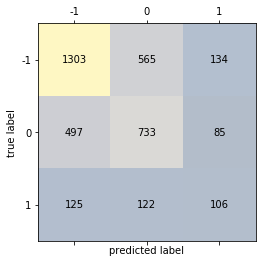

In [26]:
# fit logistic regression model with default parameters
print("\x1b[1;03;30;43m"+'Logistic regression model with default parameters:'+'\x1b[0;4;30;1m')
logit = Pipeline([('scaler', StandardScaler(with_mean=False)),('logit',LogisticRegression(solver='liblinear',multi_class='auto', random_state = 42))])
logit.fit(X_train_tfidf, y_train)
pred_train = logit.predict(X_train_tfidf)
pred_test = logit.predict(X_test_tfidf)

# logging of model performance
compute_result("LogisticRegression", pred_train, pred_test)


Hyperparameter tuning using GridSearchCV, RandomizedSearchCV and Cross-Validation:

In [27]:
# dependencies for applying Cross-validation and evaluating the cross-validated score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
#The sys.warnoptions attribute used to pass filter configurations to the interpreter can be used as a marker to indicate whether or not #warnings should be disabled
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
kfold = KFold(n_splits=3, random_state=7)
#Let's define the grid values for the hyperparameters
#dual=[True,False] #The dual formulation is only implemented for l2 penalty with liblinear solver
max_iter=[10,20,30,40,50,70,100,110,120,130,140] #Maximum number of iterations taken to converge.
# C value represents the regularization which controls the trade off between smooth decision boundary and classifying the training points correctly.
C = [1.0,1.5,2.0,2.5] 

param_grid = dict(max_iter=max_iter,C=C)

import time

lr = LogisticRegression(solver = 'lbfgs',multi_class = 'auto')
# Build the k-fold cross-validator
grid = GridSearchCV(estimator=lr, param_grid=param_grid,cv = 5, n_jobs = -1)

start_time = time.time()
grid_result = grid.fit(X_train_tfidf, y_train)
# Summarize results
print("GridSearchCV: Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' s')

"""Let's rerun everything but this time with the random search. Scikit-learn provides RandomSearchCV to do that."""
random = RandomizedSearchCV(estimator=lr, param_distributions=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
random_result = random.fit(X_train_tfidf, y_train)
# Summarize results
print("\n")
print("Randomized Search:Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' s')


GridSearchCV: Best: 0.621117 using {'C': 2.0, 'max_iter': 120}
Execution time: 84.251149892807 s


Randomized Search:Best: 0.616008 using {'max_iter': 110, 'C': 2.5}
Execution time: 9.94310712814331 s


We can see an increase in both the accuracy scores when we compare with default parameters. The random search yielded almost the same accuracy as GridSearchCV but in a much lesser time.

___2. Tuned Logistic Regression model:___

Logistic regression model with hyperparameter tuning:
Classification results based on the testset:
               precision    recall  f1-score   support

          -1       0.67      0.80      0.73      2002
           0       0.57      0.51      0.54      1315
           1       0.62      0.24      0.34       353

   micro avg       0.64      0.64      0.64      3670
   macro avg       0.62      0.51      0.54      3670
weighted avg       0.63      0.64      0.62      3670

Accuracy:	0.6381

Confusion Matrix:


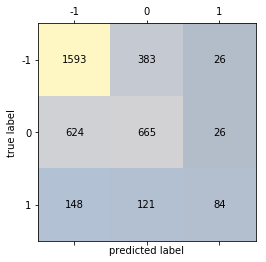

In [28]:
# fit logistic regression model with hyper parameters
print("\x1b[1;03;30;43m"+'Logistic regression model with hyperparameter tuning:'+'\x1b[0;4;30;1m')
logit1 = grid_result
pred_train = logit1.predict(X_train_tfidf)
pred_test = logit1.predict(X_test_tfidf)

# logging of model performance
compute_result("Tuned LogisticRegression", pred_train, pred_test)


___3. SupportVectorMachine classifier with default parameters___

support vector machine model with default parameters:
Classification results based on the testset:
               precision    recall  f1-score   support

          -1       0.64      0.85      0.73      2002
           0       0.58      0.43      0.49      1315
           1       0.73      0.05      0.10       353

   micro avg       0.62      0.62      0.62      3670
   macro avg       0.65      0.44      0.44      3670
weighted avg       0.62      0.62      0.58      3670

Accuracy:	0.6221

Confusion Matrix:


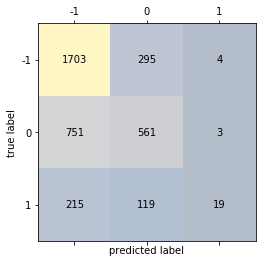

In [29]:
# fit support vector machine model with default parameters
print("support vector machine model with default parameters:")
svc = Pipeline([('scaler', StandardScaler(with_mean=False)),('svc', SVC())])
svc.fit(X_train_tfidf, y_train)
pred_train = svc.predict(X_train_tfidf)
pred_test = svc.predict(X_test_tfidf)

# logging of model performance
compute_result("SVC", pred_train, pred_test)

In [30]:
# Get the names of the parameters
svc.get_params().keys()

dict_keys(['memory', 'steps', 'scaler', 'svc', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'svc__C', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])

Hyperparameter tuning of SVC:

In [36]:
# dependencies for applying Cross-validation and evaluating the cross-validated score


kfold = KFold(n_splits=3, random_state=42)
#Let's define the grid values for the hyperparameters

# C value represents the regularization which controls the trade off between smooth decision boundary and classifying the training points correctly.
C = [1.5,2.0,2.5] 
gamma = [1,5,10]

param_grid = dict(C=C, gamma = gamma)

import time

svc =SVC()
# Build the k-fold cross-validator
grid = GridSearchCV(estimator=svc, param_grid=param_grid,cv = 5)

start_time = time.time()
grid_result_svc = grid.fit(X_train_tfidf, y_train)
# Summarize results



GridSearchCV: Best: 0.621117 using {'C': 2.0, 'max_iter': 120}
Execution time: 4650.318002939224 s


In [47]:
print("GridSearchCV: Best: %f using %s" % (grid_result_svc.best_score_, grid_result_svc.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' s')



GridSearchCV: Best: 0.642711 using {'C': 2.0, 'gamma': 1}
Execution time: 38424.81240916252 s


___4. Tuned SupportVector Classifier:___

Support Vector Machine with hyperparameter tuning:
Classification results based on the testset:
               precision    recall  f1-score   support

          -1       0.69      0.81      0.75      2002
           0       0.60      0.53      0.57      1315
           1       0.59      0.26      0.36       353

   micro avg       0.66      0.66      0.66      3670
   macro avg       0.63      0.54      0.56      3670
weighted avg       0.65      0.66      0.65      3670

Accuracy:	0.6608

Confusion Matrix:


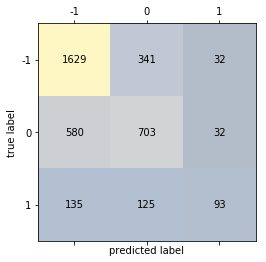

In [37]:
# fit Support Vector model with hyper parameters
pd.reset_option("^display")
print("\x1b[1;03;30;43m"+'Support Vector Machine with hyperparameter tuning:'+'\x1b[0;4;30;1m')
svc1 = grid_result_svc
pred_train = svc1.predict(X_train_tfidf)
pred_test = svc1.predict(X_test_tfidf)

# logging of model performance
compute_result("Tuned SVC", pred_train, pred_test)


In [34]:
svc

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

___5. Random forest model with default parameters:___

Random forest model with default parameters:


Classification results based on the testset:
               precision    recall  f1-score   support

          -1       0.66      0.83      0.73      2002
           0       0.59      0.49      0.54      1315
           1       0.70      0.13      0.22       353

   micro avg       0.64      0.64      0.64      3670
   macro avg       0.65      0.48      0.50      3670
weighted avg       0.64      0.64      0.61      3670

Accuracy:	0.6398

Confusion Matrix:


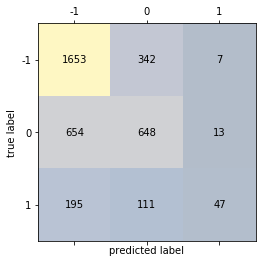

In [92]:
# import libraries
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# fit random forest model with default parameters
print("Random forest model with default parameters:")
print("\n")
rfc = Pipeline([('scaler', StandardScaler(with_mean=False)),('rfc', RandomForestClassifier(n_estimators = 100))])
rfc.fit(X_train_tfidf, y_train)
pred_train = rfc.predict(X_train_tfidf)
pred_test = rfc.predict(X_test_tfidf)

compute_result("RandomForestClassifier", pred_train, pred_test)

Hyperparameter tuning with RandomizedSearchCV:

In [82]:
# dependencies for applying Cross-validation and evaluating the cross-validated score



#Let's define the grid values for the hyperparameters

param_grid = { 
    'n_estimators': [200, 500, 700,1000],
    'max_features': [None,'auto', 'sqrt'],
    'max_depth': [6,8,10],
    'criterion' :['gini', 'entropy']
}


rfc =RandomForestClassifier()
# Build the k-fold cross-validator with the random search. Scikit-learn provides RandomSearchCV to do that."""
random = RandomizedSearchCV(estimator=rfc, param_distributions=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
random_result = random.fit(X_train_tfidf, y_train)
# Summarize results
print("\n")
print("Randomized Search:Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' s')




Randomized Search:Best: 0.588147 using {'n_estimators': 1000, 'max_features': None, 'max_depth': 6, 'criterion': 'gini'}
Execution time: 414.2102258205414 s


___6. Tuned RandomForest Classifier:___

RandomForest Classification with hyperparameter tuning:


Classification results based on the testset:
               precision    recall  f1-score   support

          -1       0.68      0.82      0.74      2002
           0       0.60      0.53      0.57      1315
           1       0.63      0.20      0.30       353

   micro avg       0.66      0.66      0.66      3670
   macro avg       0.64      0.52      0.54      3670
weighted avg       0.65      0.66      0.64      3670

Accuracy:	0.6556

Confusion Matrix:


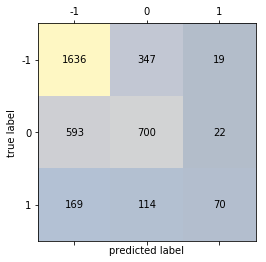

In [93]:
print("\x1b[1;03;30;43m"+'RandomForest Classification with hyperparameter tuning:'+'\x1b[0;4;30;1m')
print("\n")
rfc = Pipeline([('scaler', StandardScaler(with_mean=False)),('rfc', RandomForestClassifier(class_weight='balanced',n_estimators = 1000,criterion = 'gini'))]) # set class_weight='balanced' to adjust for the imbalanced classes
rfc.fit(X_train_tfidf, y_train)
pred_train = rfc.predict(X_train_tfidf)
pred_test = rfc.predict(X_test_tfidf)

compute_result("Tuned RandomForestClassifier", pred_train, pred_test)

___7. GradientBoosting Classifier with default parameters:___

Gradientboosting model with default parameters:
Classification results based on the testset:
               precision    recall  f1-score   support

          -1       0.62      0.88      0.73      2002
           0       0.60      0.35      0.44      1315
           1       0.64      0.14      0.24       353

   micro avg       0.62      0.62      0.62      3670
   macro avg       0.62      0.46      0.47      3670
weighted avg       0.61      0.62      0.58      3670

Accuracy:	0.6169

Confusion Matrix:


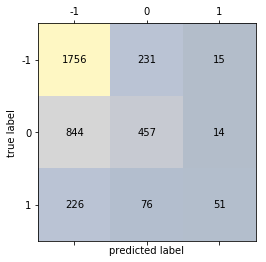

In [59]:
# fit gradientboosting model with default parameters
print("Gradientboosting model with default parameters:")
gbc = Pipeline([('scaler', StandardScaler(with_mean=False)),('gbc', GradientBoostingClassifier())]) # set class_weight='balanced' to adjust for the imbalanced classes
gbc.fit(X_train_tfidf, y_train)
pred_train = gbc.predict(X_train_tfidf)
pred_test = gbc.predict(X_test_tfidf)

compute_result("GradientBoostingClassifier", pred_train, pred_test)

Hyperparameter Tuning:

In [61]:
# Grid search of parameters to improve GradientBoostingClassifer model
parameters = {'gbc__n_estimators': np.arange(500,1000,100), 'gbc__max_features':[None,'sqrt','log2']}
gbc_cv = GridSearchCV(gbc, parameters, scoring='accuracy', cv=5)
gbc_cv.fit(X_train_tfidf, y_train)
print('Best parameters:', gbc_cv.best_params_)
print('Corresponding accuracy score:', gbc_cv.best_score_)

Best parameters: {'gbc__max_features': None, 'gbc__n_estimators': 800}
Corresponding accuracy score: 0.6264305177111716


___8. Tuned GradientBoosting Classifier:___

Classification results based on the testset:
               precision    recall  f1-score   support

          -1       0.65      0.83      0.73      2002
           0       0.60      0.44      0.51      1315
           1       0.50      0.21      0.30       353

   micro avg       0.63      0.63      0.63      3670
   macro avg       0.59      0.50      0.51      3670
weighted avg       0.62      0.63      0.61      3670

Accuracy:	0.6338

Confusion Matrix:


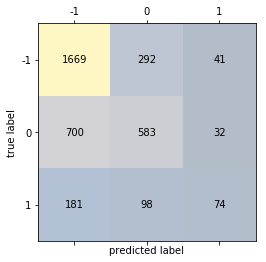

In [64]:
# fit GradientBoosting Classification model with hyper parameters
pd.reset_option("^display")
# updated GradientBoostingClassifier model with the optimized parameter
gbc = Pipeline([('scaler', StandardScaler(with_mean=False)),('gbc', GradientBoostingClassifier(n_estimators=800, max_features=None))])
gbc.fit(X_train_tfidf, y_train)
pred_train = gbc.predict(X_train_tfidf)
pred_test = gbc.predict(X_test_tfidf)
# logging of model performance
compute_result("Tuned GradientBoostingClassifier", pred_train, pred_test)


___9. DecisionTreeClassifier with default parameters:___


DecisionTreeClassifier with default parameters:
Classification results based on the testset:
               precision    recall  f1-score   support

          -1       0.64      0.65      0.65      2002
           0       0.47      0.49      0.48      1315
           1       0.33      0.26      0.29       353

   micro avg       0.55      0.55      0.55      3670
   macro avg       0.48      0.46      0.47      3670
weighted avg       0.55      0.55      0.55      3670

Accuracy:	0.5531

Confusion Matrix:


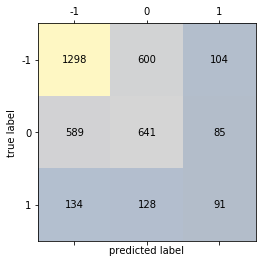

In [107]:
#import necessary packages
from sklearn.tree import DecisionTreeClassifier
print("DecisionTreeClassifier with default parameters:")
dtc = Pipeline([('scaler', StandardScaler(with_mean=False)),('dtc', DecisionTreeClassifier(random_state = 42))])
dtc.fit(X_train_tfidf, y_train)
pred_train = dtc.predict(X_train_tfidf)
pred_test = dtc.predict(X_test_tfidf)

compute_result("Decision Tree", pred_train, pred_test)

Hyperparameter tuning with RandomizedSearchCV:

In [124]:

# Creating the hyperparameter grid  
param_grid = {"max_depth": [1,2,3, 5.7,9,None], 
              "max_features": [5,10,20,40,60], 
              "min_samples_leaf": [2,4,7,9], 
              "criterion": ["gini", "entropy"]} 
  
# Instantiating Decision Tree classifier 
tree = DecisionTreeClassifier() 
  
# Instantiating RandomizedSearchCV object 

# Build the k-fold cross-validator with the random search. Scikit-learn provides RandomSearchCV to do that."""
random = RandomizedSearchCV(estimator=tree, param_distributions=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
random_result = random.fit(X_train_tfidf, y_train)
# Summarize results
print("\n")
print("Randomized Search:Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' s')




Randomized Search:Best: 0.563624 using {'min_samples_leaf': 9, 'max_features': 40, 'max_depth': None, 'criterion': 'entropy'}
Execution time: 0.6955685615539551 s


___10. Tuned DecisionTree Classifier:___

DecisionTree Classification with hyperparameter tuning:


Classification results based on the testset:
               precision    recall  f1-score   support

          -1       0.62      0.79      0.69      2002
           0       0.51      0.40      0.45      1315
           1       0.39      0.09      0.15       353

   micro avg       0.58      0.58      0.58      3670
   macro avg       0.51      0.43      0.43      3670
weighted avg       0.56      0.58      0.55      3670

Accuracy:	0.5842

Confusion Matrix:


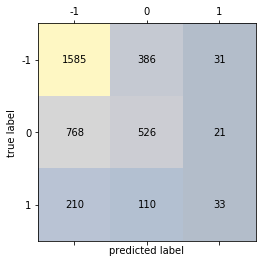

In [125]:
print("\x1b[1;03;30;43m"+'DecisionTree Classification with hyperparameter tuning:'+'\x1b[0;4;30;1m')
print("\n")
dtc = random_result
pred_train = dtc.predict(X_train_tfidf)
pred_test = dtc.predict(X_test_tfidf)

compute_result("Tuned DecisionTree", pred_train, pred_test)

__Model Comparision and Selection:__

In [5]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border-style: solid;
}

In [136]:
# Print score table

score_table

,precision,recall,f1-score,support,accuracy
LogisticRegression,0.59654,0.604132,0.599813,1658.5,0.583651
Tuned LogisticRegression,0.621218,0.650704,0.632495,1658.5,0.638147
SVC,0.606726,0.638633,0.609568,1658.5,0.622071
Tuned SVC,0.648167,0.674144,0.657839,1658.5,0.660763
RandomForestClassifier,0.624614,0.659225,0.635219,1658.5,0.639782
Tuned RandomForestClassifier,0.642582,0.674751,0.654532,1658.5,0.655586
GradientBoostingClassifier,0.60977,0.612326,0.583529,1658.5,0.616894
Tuned GradientBoostingClassifier,0.626844,0.638506,0.62146,1658.5,0.633787
Decision Tree,0.555241,0.567902,0.561467,1658.5,0.553134
Tuned DecisionTree,0.566547,0.595854,0.572282,1658.5,0.584196


 As we can see from the score table, Precision seems to be better in tuned SVC and tuned RandomForest Classifier. Precision shows how precise/accurate your model is out of those predicted positive, how many of them are actual positive. Recall actually calculates how many of the Actual Positives our model capture through labeling it as Positive. Again, tuned SVC and tuned RandomForest Classifier seems to do a better job than other models. F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall and there is an uneven class distribution (large number of Actual Negatives). Again, we can see that tuned SVC and tuned RandomForest Classifier outperformed the rest of the classifiers. If we consider accuracy as the metric, eventhough, tuned SVC performed slightly better (negligible difference) than tuned RandomForest classifier, it is computationally expensive. I think it's best if we choose tuned RandomForest Classifier as a model of choice.

___Conclusion and Limitations:___

For each of the multi-class classifiers we present two models and a report on overall accuracy, precision, recall, f1-score for 3-way classification tasks: positive versus negative versus neutral:

$Baseline\ Model\ with\ default\ parameters$

$Tuned\ Model\ with\ hyper\ parameters$

We also present a multi-class classification model by combining heterogenous data sources using Scikitlearn's Feature Union.

Our model of choice RandomForest Classifier after tuning gave the accuracy score of 0.66. Sentiment analysis research topic has evolved during the last decade with models reaching the efficiency greater than 85%. I look forward to working with a bigger dataset to improve accuracy by also considering emoticons based on their sentiment polarity for classifying the tweets. There is a lot of work to be done to detect the exact sentiment of texts because of the complexity in the English language.

___Future work:___
    
In this project,'LogisticRegression','SVC','RandomForestClassifier',GradientBoostingClassifier','Decision Tree' were used. I would also like to explore other machine learning algorithms like Naive Bayes, MaxEnt and Artificial Neural networks.



__Deliverables:__
    
Powerpoint presentation

Python code used for data preprocessing, analysing, modeling in  Github link.

A PDF report on the findings.

 